In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset (Example dataset URL: replace with actual URL if required)
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

In [3]:
# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [4]:
# Check for null values
print("\nChecking for null values in each column:")
print(data.isnull().sum())


Checking for null values in each column:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [5]:
# Remove rows with any null values
data = data.dropna()

In [6]:
# Split data into features and target variable
X = data[['rm']]  # Using the 'rm' column (average number of rooms per dwelling) as a feature
y = data['medv']  # 'medv' is the median value of owner-occupied homes in $1000s

In [7]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predict on the test set
y_pred = model.predict(X_test)

In [10]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Model Performance:
Mean Squared Error: 46.144775347317264
R^2 Score: 0.3707569232254778


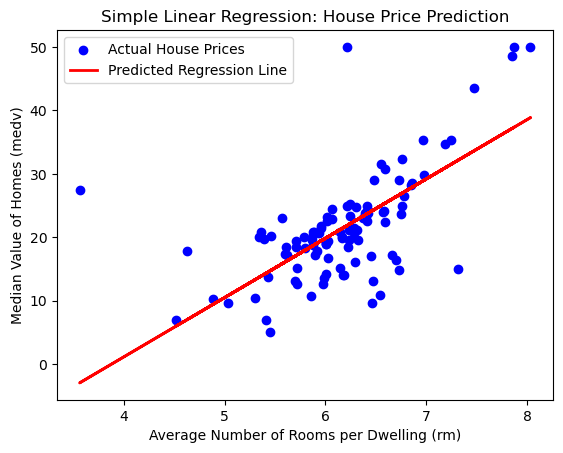

In [11]:
# Plotting the regression line on the test data
plt.scatter(X_test, y_test, color='blue', label='Actual House Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Regression Line')
plt.xlabel("Average Number of Rooms per Dwelling (rm)")
plt.ylabel("Median Value of Homes (medv)")
plt.title("Simple Linear Regression: House Price Prediction")
plt.legend()
plt.show()

In [12]:
#q2

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [14]:
# 1. Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
wholesale_data = pd.read_csv(url)

In [15]:
# Display the first few rows
print("First few rows of the dataset:")
print(wholesale_data.head())

First few rows of the dataset:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [16]:
# 2. Check for null values and drop them if necessary
print("\nChecking for missing values:")
print(wholesale_data.isnull().sum())


Checking for missing values:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [17]:
# Dropping rows with missing values (if any)
wholesale_data = wholesale_data.dropna()

In [18]:
# 3. Normalize the spending data
scaler = StandardScaler()
spending_data = wholesale_data.iloc[:, 2:]  # Select only spending columns (skip 'Channel' and 'Region')
scaled_data = scaler.fit_transform(spending_data)

In [19]:
# 4. Perform Agglomerative Clustering (updated to use 'metric' instead of 'affinity')
agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters = agg_clustering.fit_predict(scaled_data)

In [20]:
# Add cluster labels to the original dataset
wholesale_data['Cluster'] = clusters
print("\nClustered Data:")
print(wholesale_data.head())


Clustered Data:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        2  
1        1776        2  
2        7844        2  
3        1788        1  
4        5185        1  


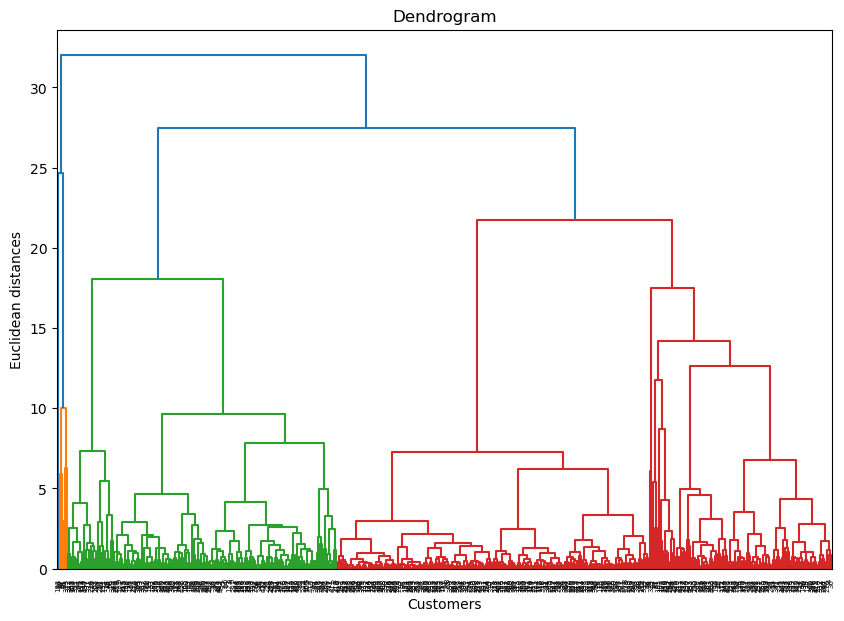

In [21]:
# 5. Visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [22]:
# 6. Evaluate the clustering with Silhouette Score
score = silhouette_score(scaled_data, clusters)
print(f'\nSilhouette Score: {score}')


Silhouette Score: 0.2646091480214908
